# EDA

Created: 2022.05.25 <br>
Lecture: [Full Stack Deep Learning (2021), online course](https://fullstackdeeplearning.com/) <br>

### NoteBook Author

🐈 : [ProtossDragoon](https://github.com/ProtossDragoon) ([Janghoo Lee](https://davincijang.space/)) <br>
📧 : dlwkdgn1@naver.com <br>

### Reference

[Kaggle Notebook: Natural Language Processing (NLP) for Beginners](https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners#%F0%9F%94%8D-Exploratory-Data-Analysis-(EDA)) <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
def read_sample_data(path):
    df_sms = pd.read_csv(path, encoding='latin-1')
    df_sms.dropna(how="any", inplace=True, axis=1)
    df_sms.columns = ['label', 'message']
    return df_sms
    
df_sms = read_sample_data('../data/sample/spam.csv')
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df_sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df_sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
# convert label to a numerical variable
df_sms['label_num'] = df_sms.label.map({'ham':0, 'spam':1})
df_sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
df_sms['message_len'] = df_sms.message.apply(len)
df_sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


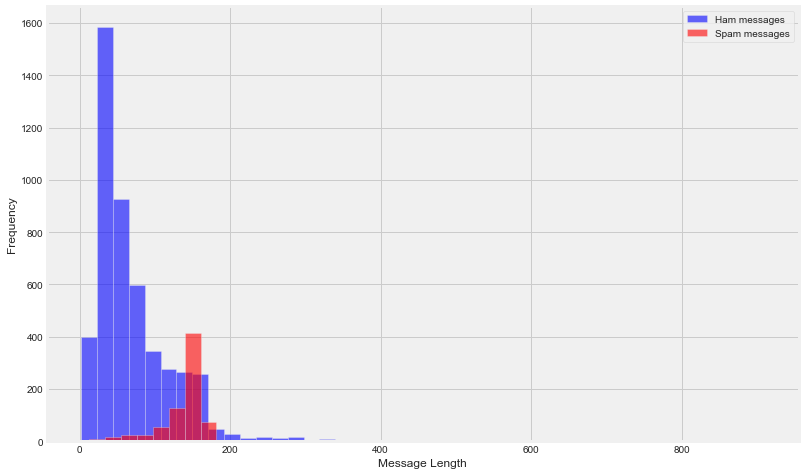

In [7]:
plt.figure(figsize=(12, 8))
df_sms[df_sms.label=='ham' ].message_len.plot(bins=43, kind='hist', color='blue', label='Ham messages', alpha=0.6)
df_sms[df_sms.label=='spam'].message_len.plot(         kind='hist', color='red', label='Spam messages', alpha=0.6)
plt.xlabel("Message Length")
plt.legend()

In [8]:
df_sms[df_sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [9]:
df_sms[df_sms.message_len == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요합니다. 여기서 큰 의미가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들을 말합니다. 예를 들면, I, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 경우가 있습니다. 이러한 단어들을 **불용어(stopword)**라고 하며, NLTK에서는 위와 같은 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의하고 있습니다. [출처: 딥러닝을 위한 자연어 처리 입문](https://wikidocs.net/22530)

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

def text_process(msg):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # 1. 철자 단위 검사 후 문장부호(punctuation) 제거
    nopunc = [character for character in msg if character not in string.punctuation]
    nopunc = ''.join(nopunc)
    # 2. 불용어(stop word) 제거
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

text_process('Here\'s my example sentence. Hello, world~! How are u?')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janghoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Heres example sentence Hello world'

In [11]:
# 'message' 열에서 불용어를 제거하여 'clean_message' 라는 이름의 컬럼을 새로 만든다.
df_sms['clean_message'] = df_sms.message.apply(text_process)
df_sms.head()

,label,message,label_num,message_len,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [12]:
# 불용어가 제거된 문자 메시지를 모두 소문자로 바꾸고, 자주 등장하는 단어의 개수를 세어본다.
from collections import Counter
import pprint

def sentence_to_lowercase(sentence:str)->list:
    return [word.lower() for word in sentence.split()]

ham_words = Counter()
spam_words = Counter()

ham_sentences = df_sms[df_sms.label=='ham'].clean_message.apply(sentence_to_lowercase)
for sentence in ham_sentences:
    ham_words.update(sentence)

spam_sentences = df_sms[df_sms.label=='spam'].clean_message.apply(sentence_to_lowercase)
for sentence in spam_sentences:
    spam_words.update(sentence)
    
print('ham_words:', ham_words.most_common(50))
print('spam_words:', spam_words.most_common(50))

ham_words: [('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]
spam_words: [('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56)

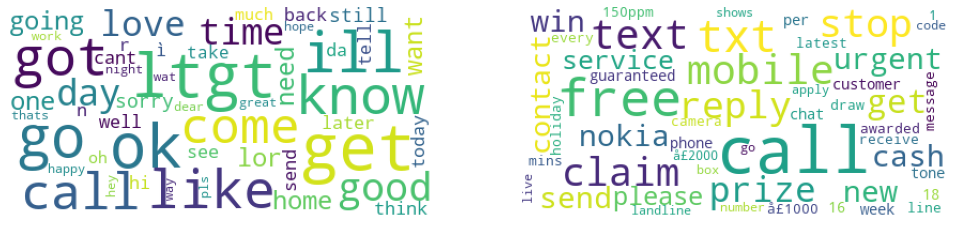

In [13]:
from wordcloud import WordCloud

def draw_wordcloud(count:Counter, most_common=50):
    wc = WordCloud(background_color="white", max_font_size=60)
    cloud = wc.generate_from_frequencies(dict(count.most_common(most_common)))
    plt.axis('off')
    plt.imshow(cloud)

plt.figure(figsize=(15, 12))
plt.subplot(1,2,1)
draw_wordcloud(ham_words)
plt.subplot(1,2,2)
draw_wordcloud(spam_words)

In [14]:
x = df_sms.clean_message
y = df_sms.label_num
print(x.shape, y.shape)

(5572,) (5572,)


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(4179,) (4179,)
(1393,) (1393,)


문장의 길이와, 등장하는 단어의 종류에 차이가 있음을 알게 되었으므로, 이들을 모델링할 수 있는 전처리 방법을 찾아봅니다. Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터의 수치화 표현 방법입니다. 사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원합니다. 이를 이용하면 영어에 대해서는 손쉽게 BoW를 만들 수 있습니다. [출처: 딥러닝을 위한 자연어 처리 입문](https://wikidocs.net/22650)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [17]:
# 단어의 빈도수를 기록한다.
x_train_dtm = vect.fit_transform(x_train)
x_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [18]:
# 각 단어의 인덱스가 어떻게 부여되었는지를 출력해볼 수 있다.
for i, (word, index) in enumerate(vect.vocabulary_.items()):
    print(f'idx {index}: word \'{word}\'')
    if i >= 5:
        print('...')
        break

idx 3459: word 'height'
idx 2013: word 'confidence'
idx 866: word 'aeronautics'
idx 5601: word 'professors'
idx 7643: word 'wer'
idx 1650: word 'calld'
...


문서 단어 행렬(Document-Term Matrix, DTM)이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것을 말합니다.
우리의 상황에 대입하여 쉽게 생각하면, 각 메시지에 대한 BoW를 하나의 행렬로 만든 것으로 생각할 수 있습니다. [출처: 딥러닝을 위한 자연어 처리 입문](https://wikidocs.net/24559)

In [19]:
print(x_train_dtm.toarray().shape)
print(repr(x_train_dtm.toarray()))

(4179, 7996)
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])


In [20]:
np.unique(x_train_dtm.toarray()[0])

array([0, 1, 2, 3])

모든 문자 메시지에는 중요한 단어와 불필요한 단어들이 혼재되어 있습니다. 앞서 불용어(stopwords)와 같은 단어들은 빈도수가 높더라도 자연어 처리에 있어 의미를 갖지 못하는 단어라고 언급한 바 있습니다. TF-IDF를 이용하면 모든 문자 메시지에서 자주 등장하는 단어는 중요도가 낮다고 판단하고, 특정 문자 메시지에서만 자주 등장하는 단어는 중요도가 높다고 판단할 수 있습니다. TF-IDF 값이 낮으면 특정 단어의 중요도가 낮은 것이며, TF-IDF 값이 크면 특정 단어의 중요도가 큰 것입니다. [출처: 딥러닝을 위한 자연어 처리 입문](https://wikidocs.net/31698)

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
print(x_train_tfidf.toarray().shape)
print(repr(x_train_tfidf.toarray()))

(4179, 7996)
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])


In [24]:
np.unique(x_train_tfidf.toarray()[0])

array([0.        , 0.10496032, 0.10748019, 0.11081332, 0.12055714,
       0.12756838, 0.13366149, 0.14037493, 0.14482718, 0.15420489,
       0.15865715, 0.1643971 , 0.17248712, 0.25957521, 0.3173143 ,
       0.32879421, 0.51746135])